In [1]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import numpy as np
import re
from selenium import webdriver
import time
import string

In [2]:
cik_index = pd.read_csv('cik_ticker.csv', sep = '|')

In [1079]:
ciks = []
names = []

for i in range(0,len(df)):
    # iterate through years to pull names and links of companies that have filed for bankruptcy
    
    url = 'https://www.sec.gov/cgi-bin/srch-edgar?text='+df.index[i]+'+form-type+%3D+10-k&first=2014&last=2020'
    response = requests.get(url)
    page = response.text
    info = BeautifulSoup(page,"lxml")
    
    try:
        findings = info.find_all('table')[4].find_all('a')

        ciks.append(str(findings[0]).split('/')[4])
        names.append(findings[0].text)
        
    except Exception:
        ciks.append('NA')
        names.append('NA')
        continue
    

KeyboardInterrupt: 

In [120]:
url = 'https://www.sec.gov/cgi-bin/srch-edgar?text='+'American Apparel'+'+form-type+%3D+10-k&first=2014&last=2020'



In [450]:
df['CIK']=ciks
df['EDGAR_name'] = names

In [451]:
df.to_csv('bankrupt.csv', index=True) 

In [233]:
url = 'https://lopucki.law.ucla.edu/spreadsheet.htm'
response = requests.get(url)
page = response.text
info = BeautifulSoup(page,"lxml")
table=info.find('table')
table= table.find_all('td')

bankruptcy_dat = {}
column_labs=[]
for labs in table[0].find_all('th'):
    column_labs.append(labs.text)

bankruptcy_dat = {}
for rows in table[0].find_all('tr')[1:]:
    dat = rows.text.split('\n')[1:26]
    bankruptcy_dat[dat[0]]=dict(zip(column_labs, dat))

  


In [249]:
df = pd.DataFrame.from_dict(bankruptcy_dat, orient='index')
# clean columns
df.columns = df.columns.map(lambda x: re.sub(r'\W+', '', x).lower())

In [1262]:
df

,debtorname,industry,industrygroup,cause,datefiled,disposition,363sale,duration,incstate,districtfiled,...,datedisposed,assetsize,employeesize,annualsales,assetsmillions,chapteratfiling,debtorsattorney,matches,CIK,EDGAR_name
"Bush Industries, Inc.","Bush Industries, Inc.",D: Manufacturing,25 Furniture And Fixtures,Not tort,3/31/2004,confirmed,no 363 sale,212,DE,NY WD,...,10/29/2004,d Less than $500 million,"c 1,000 but less than 10,000",471569477.054429,430.0,Chapter 11,Hodgson Russ,Bush Industries Inc,0000758604,BUSH INDUSTRIES INC
SleepMaster LLC,SleepMaster LLC,D: Manufacturing,25 Furniture And Fixtures,Not tort,11/16/2001,confirmed,no 363 sale,433,NJ,DE,...,1/23/2003,c $500 million but less than $1billion,"c 1,000 but less than 10,000",445841418.523112,635.0,Chapter 11,Pachulski Stang,,NA,NA
"Panolam Industries International, Inc.","Panolam Industries International, Inc.",D: Manufacturing,25 Furniture And Fixtures,Not tort,11/4/2009,confirmed,no 363 sale,36,DE,DE,...,12/10/2009,d Less than $500 million,"c 1,000 but less than 10,000",440861562.728955,496.0,Chapter 11,Weil Gotshal,Industries International Inc,0001086385,PANOLAM INDUSTRIES INTERNATIONAL INC
"Falcon Products, Inc.","Falcon Products, Inc.",D: Manufacturing,25 Furniture And Fixtures,Not tort,1/31/2005,confirmed,no 363 sale,259,DE,MO ED,...,10/17/2005,d Less than $500 million,"c 1,000 but less than 10,000",343467939.171474,364.0,Chapter 11,Thompson Coburn,Falcon Products Inc,0000034339,FALCON PRODUCTS INC /DE/
Gaylord Container Corp,Gaylord Container Corp,D: Manufacturing,26 Paper and Allied Products,Not tort,9/11/1992,confirmed,no 363 sale,35,DE,LA ED,...,10/16/1992,b $1 billion but less than $10 billion,"c 1,000 but less than 10,000",1331412939.8443,1776.0,Chapter 11,Kirkland Ellis,,NA,NA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Noble Corporation plc,Noble Corporation plc,B: Mining,13 Oil And Gas Extraction,Not tort,7/31/2020,pending,case pending,,England and Wales,TX SD,...,,b $1 billion but less than $10 billion,"c 1,000 but less than 10,000",1309554320.84014,8311.0,Chapter 11,Skadden Arps,,NA,NA
"Tailored Brands, Inc.","Tailored Brands, Inc.",G: Retail Trade,56 Apparel And Accessory Stores,Not tort,8/2/2020,pending,case pending,,TX,TX SD,...,,b $1 billion but less than $10 billion,"b 10,000 but less than 30,000",2881261000,2419.0,Chapter 11,Kirkland Ellis,,0000884217,TAILORED BRANDS INC (TLRD)
"Stein Mart, Inc.","Stein Mart, Inc.",G: Retail Trade,56 Apparel And Accessory Stores,Not tort,8/12/2020,pending,case pending,,FL,FL MD,...,,c $500 million but less than $1billion,"c 1,000 but less than 10,000",1236473000,766.0,Chapter 11,Foley Lardner,Stein Mart Inc,0000884940,STEIN MART INC (SMRT)
Valaris plc,Valaris plc,B: Mining,13 Oil And Gas Extraction,Not tort,8/19/2020,pending,case pending,,England and Wales,TX SD,...,,a $10 billion and over,"c 1,000 but less than 10,000",2053200000,16931.0,Chapter 11,Kirkland Ellis,,0000314808,Valaris plc (VAL)


In [283]:
# find issues in annual sales
df = df[~pd.to_numeric(df['annualsales'], errors='coerce').isnull()]

In [289]:
df = df.astype({'assetsmillions': 'float'})

In [297]:
df['assetsize'].value_counts()

b $1 billion but less than $10 billion    507
c $500 million but less than $1billion    339
d Less than $500 million                  277
a $10 billion and over                     77
Name: assetsize, dtype: int64

In [340]:
df.to_csv('bankrupt.csv', index=True) 

In [448]:
# Try and get CIK codes for bankrupt companies 

ciks = []
names = []

for i in range(0,len(df)):
    # iterate through years to pull names and links of companies that have filed for bankruptcy
    s_year = pd.DatetimeIndex(df['datefiled']).year[i]-3
    e_year = pd.DatetimeIndex(df['datefiled']).year[i]+2
    name = df['debtorname'][i]
    
    url ='https://www.sec.gov/edgar/search/#/dateRange=custom&startdt='+str(s_year)+'-01-01&enddt='+str(e_year)+'-01-01&category=all&locationType=located&locationCode=all&entityName='+name+'&filter_forms=10-K&page=1'
    
    try:
        # we have to click through the first message accepting cookies. this should only need to be done once a window is open.
        driver.get(url)
        time.sleep(.5)
        butt = driver.find_element_by_xpath('//*[@id="col-cik"]').click()
        time.sleep(.5)
        CIK = driver.find_element_by_xpath('/html/body/div[3]/div[2]/div[2]/table/tbody/tr[1]/td[5]').text
        name = driver.find_element_by_xpath('/html/body/div[3]/div[2]/div[2]/table/tbody/tr[1]/td[4]').text

        CIK = CIK.split('CIK ')[1]
        ciks.append(CIK)
        names.append(name)
        
    except Exception:
        ciks.append('NA')
        names.append('NA')
        continue

In [449]:
names

['BUSH INDUSTRIES INC',
 'NA',
 'PANOLAM INDUSTRIES INTERNATIONAL INC',
 'FALCON PRODUCTS INC /DE/',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'READERS DIGEST ASSOCIATION INC',
 'IDEARC INC.',
 'NA',
 'SOLUTIA INC',
 'NA',
 'GEO SPECIALTY CHEMICALS INC',
 'PIONEER COMPANIES INC',
 'GENTEK INC',
 'NA',
 'WELLMAN INC',
 'HINES HORTICULTURE INC',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'SUN-TIMES MEDIA GROUP INC',
 'NA',
 'NA',
 'NA',
 'NA',
 'ZIFF DAVIS HOLDINGS INC',
 'AMERICAN PLUMBING & MECHANICAL INC',
 'NA',
 'NA',
 'INTEGRATED ELECTRICAL SERVICES INC (IESC)',
 'NA',
 'NA',
 'NA',
 'PIERRE FOODS INC',
 'NA',
 'VLASIC FOODS INTERNATIONAL INC',
 'NA',
 'AURORA FOODS INC /DE/',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'DAN RIVER INC /GA/',
 'NA',
 'DYERSBURG CORP',
 'BURLINGTON INDUSTRIES INC /DE/',
 'GALEY & LORD INC',
 'NA',
 'CONE MILLS CORP',
 'GALEY & LORD INC',
 'NA',
 'NA',
 '

In [321]:
text = '<a href="/wiki/24_Hour_Fitness" title="24 Hour Fitness">24 Hour Fitness</a>'
m = re.search('"(.+?)"',text)
print(m)
if m:
    found = m.group(1)
print("here is the Quoted String:",found)

<re.Match object; span=(8, 31), match='"/wiki/24_Hour_Fitness"'>
here is the Quoted Sting: /wiki/24_Hour_Fitness


In [439]:
ciks

['NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA',
 'NA']

In [352]:
def fuzzy_merge(df_1, df_2, key1, key2, threshold=90, limit=2):
    """
    :param df_1: the left table to join
    :param df_2: the right table to join
    :param key1: key column of the left table
    :param key2: key column of the right table
    :param threshold: how close the matches should be to return a match, based on Levenshtein distance
    :param limit: the amount of matches that will get returned, these are sorted high to low
    :return: dataframe with boths keys and matches
    """
    s = df_2[key2].tolist()

    m = df_1[key1].apply(lambda x: process.extract(x, s, limit=limit))    
    df_1['matches'] = m

    m2 = df_1['matches'].apply(lambda x: ', '.join([i[0] for i in x if i[1] >= threshold]))
    df_1['matches'] = m2

    return df_1

In [353]:
df_matched = fuzzy_merge(df,cik_index,'debtorname','Name',95,limit=2)

In [335]:
cik_index

,CIK,Ticker,Name,Exchange,SIC,Business,Incorporated,IRS
0,1090872,A,Agilent Technologies Inc,NYSE,3825.0,CA,DE,770518772.0
1,4281,AA,Alcoa Inc,NYSE,3350.0,PA,PA,250317820.0
2,1332552,AAACU,Asia Automotive Acquisition Corp,NaN,6770.0,DE,DE,203022522.0
3,1287145,AABB,Asia Broadband Inc,OTC,8200.0,GA,NV,721569126.0
4,1024015,AABC,Access Anytime Bancorp Inc,NaN,6035.0,NM,DE,850444597.0
...,...,...,...,...,...,...,...,...
13732,827056,ZVXI,Zevex International Inc,NaN,3845.0,UT,NV,870462807.0
13733,846475,ZYNX,Zynex Inc,NaN,3845.0,CO,NV,870403828.0
13734,1406796,ZYTC,Zyto Corp,NaN,3841.0,UT,NaN,205534033.0
13735,748015,ZZ,Sealy Corp,NYSE,2510.0,WA,DE,363284147.0


In [358]:
df_matched.to_csv('bankrupt_match.csv', index=True) 

In [381]:
url ='https://www.sec.gov/edgar/search/#/dateRange=custom&startdt=2000-10-01&enddt=2020-10-14&category=all&locationType=located&locationCode=all&entityName=Drypers%20Corp.&page=1'


response = requests.get(url)
page = response.text
info = BeautifulSoup(page,"lxml")

In [383]:
from selenium import webdriver
# indicate where in my local machine the geckodriver is for using firefox.
driver = webdriver.Firefox(executable_path=r'C:/Users/atag3/Desktop/NYC DSA Python EDA/Untitled Folder/geckodriver.exe')



In [4]:
df_ciks_match = pd.read_csv('bankrupt_gsheet.csv')

In [5]:
df_ciks_match_filt = df_ciks_match[~df_ciks_match.CIK.isna()]

In [6]:
df_ciks_match = pd.read_csv('bankrupt_gsheet.csv')
df_ciks_match['datefiled']=pd.to_datetime(df_ciks_match['datefiled'], format="%m/%d/%Y")
df_ciks_match_filt = df_ciks_match[df_ciks_match.datefiled.dt.year>=2010]
df_ciks_match_filt.shape

(317, 30)

In [7]:
df_ciks_match_filt = df_ciks_match_filt[~df_ciks_match_filt.CIK.isna()]
df_ciks_match_filt.shape

(311, 30)

In [8]:
df_ciks_match_filt
df_ciks_match_filt.CIK = df_ciks_match_filt.CIK.astype(int)

In [9]:
df_ciks_match_filt = df_ciks_match_filt.reset_index()

In [10]:
df_ciks_match_filt['datefiled'][0].year-3

2007

In [11]:
df_ciks_match_filt

,index,Unnamed: 0,debtorname,industry,industrygroup,cause,datefiled,disposition,363sale,duration,...,assetsize,employeesize,annualsales,assetsmillions,chapteratfiling,debtorsattorney,matches,CIK,EDGAR_name,Unnamed: 29
0,79,"Xerium Technologies, Inc.","Xerium Technologies, Inc.",D: Manufacturing,22 Textile Mill Products,Not tort,2010-03-30,confirmed,no 363 sale,43.0,...,c $500 million but less than $1billion,"c 1,000 but less than 10,000",5.972617e+08,828,Chapter 11,Cadwalader Wickersham,Xerium Technologies Inc,1287151,XERIUM TECHNOLOGIES INC (XRM),NaN
1,88,"Newark Group, Inc.","Newark Group, Inc.",D: Manufacturing,26 Paper and Allied Products,Not tort,2010-06-09,confirmed,no 363 sale,51.0,...,c $500 million but less than $1billion,"c 1,000 but less than 10,000",1.226917e+09,742,Chapter 11,Lowenstein Sandler,NaN,1047290,"NEWARK GROUP, INC",NaN
2,151,"Neenah Enterprises, Inc. (2010)","Neenah Enterprises, Inc. (2010)",D: Manufacturing,33 Primary Metal Industries,Not tort,2010-02-03,confirmed,no 363 sale,153.0,...,d Less than $500 million,"c 1,000 but less than 10,000",3.993346e+08,344,Chapter 11,Sidley Austin,Neenah Enterprises Inc,855667,NaN,NaN
3,176,"Orleans Homebuilders, Inc.","Orleans Homebuilders, Inc.",C: Construction,15 Building Construction General Contractors A...,Not tort,2010-03-01,confirmed,no 363 sale,275.0,...,c $500 million but less than $1billion,"d 200 but less than 1,000",6.966172e+08,855,Chapter 11,Cahill Gordon,Orleans Homebuilders Inc,38570,ORLEANS HOMEBUILDERS INC,NaN
4,204,"U.S. Concrete, Inc.","U.S. Concrete, Inc.",D: Manufacturing,"32 Stone, Clay, Glass, And Concrete Products",Not tort,2010-04-29,confirmed,no 363 sale,91.0,...,d Less than $500 million,"c 1,000 but less than 10,000",6.372318e+08,464,Chapter 11,Kirkland Ellis,NaN,1307784,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306,1195,Noble Corporation plc,Noble Corporation plc,B: Mining,13 Oil And Gas Extraction,Not tort,2020-07-31,pending,case pending,NaN,...,b $1 billion but less than $10 billion,"c 1,000 but less than 10,000",1.309554e+09,8311,Chapter 11,Skadden Arps,NaN,1458891,NaN,NE
307,1196,"Tailored Brands, Inc.","Tailored Brands, Inc.",G: Retail Trade,56 Apparel And Accessory Stores,Not tort,2020-08-02,pending,case pending,NaN,...,b $1 billion but less than $10 billion,"b 10,000 but less than 30,000",2.881261e+09,2419,Chapter 11,Kirkland Ellis,NaN,884217,TAILORED BRANDS INC (TLRD),NaN
308,1197,"Stein Mart, Inc.","Stein Mart, Inc.",G: Retail Trade,56 Apparel And Accessory Stores,Not tort,2020-08-12,pending,case pending,NaN,...,c $500 million but less than $1billion,"c 1,000 but less than 10,000",1.236473e+09,766,Chapter 11,Foley Lardner,Stein Mart Inc,884940,STEIN MART INC (SMRT),NaN
309,1198,Valaris plc,Valaris plc,B: Mining,13 Oil And Gas Extraction,Not tort,2020-08-19,pending,case pending,NaN,...,a $10 billion and over,"c 1,000 but less than 10,000",2.053200e+09,16931,Chapter 11,Kirkland Ellis,NaN,314808,Valaris plc (VAL),NaN


In [158]:
# Try and make a big df of documents dates and links.
df_docs = pd.DataFrame(columns=['Filings', 'Format', 'Description','Filing Date','File/Film Number','links'])

for l in range(0,len(df_ciks_match_filt)):
    s_year=df_ciks_match_filt['datefiled'][l].year-3
    e_year=df_ciks_match_filt['datefiled'][l].year+1
    CIK = df_ciks_match_filt['CIK'][l]
    
    try:
        url = 'https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK='+str(CIK)+'&type=10-&dateb='+str(e_year)+'&datea='+str(s_year)+'1230&owner=include&count=40&search_text='
        response = requests.get(url)
        page = response.text
        info = BeautifulSoup(page,"xml")

        doc_links = info.findAll('a', attrs={'id':'documentsbutton'})
        doc_table= pd.read_html(url)[2]

        links = []
        for i in range(0,len(doc_table)):
            links.append(doc_links[i]['href'])
        doc_table['links'] =links
        df_docs = df_docs.append(doc_table, ignore_index=True)
        
    except Exception:
        continue
        



In [159]:
df_docs

,Filings,Format,Description,Filing Date,File/Film Number,links
0,10-Q,Documents Interactive Data,Quarterly report [Sections 13 or 15(d)]Acc-no:...,2018-07-26,001-3249818972122,/Archives/edgar/data/1287151/00012871511800009...
1,10-Q,Documents Interactive Data,Quarterly report [Sections 13 or 15(d)]Acc-no:...,2018-04-30,001-3249818790101,/Archives/edgar/data/1287151/00012871511800008...
2,10-K/A,Documents,"[Amend] Annual report [Section 13 and 15(d), n...",2018-04-30,001-3249818789610,/Archives/edgar/data/1287151/00012871511800007...
3,10-K,Documents Interactive Data,"Annual report [Section 13 and 15(d), not S-K I...",2018-02-28,001-3249818651569,/Archives/edgar/data/1287151/00012871511800004...
4,10-Q,Documents Interactive Data,Quarterly report [Sections 13 or 15(d)]Acc-no:...,2017-10-30,001-32498171162728,/Archives/edgar/data/1287151/00012871511700012...
...,...,...,...,...,...,...
4288,10-Q,Documents Interactive Data,Quarterly report [Sections 13 or 15(d)]Acc-no:...,2018-09-13,001-14035181068795,/Archives/edgar/data/6885/000000688518000276/0...
4289,10-Q,Documents Interactive Data,Quarterly report [Sections 13 or 15(d)]Acc-no:...,2018-06-14,001-1403518899339,/Archives/edgar/data/6885/000000688518000210/0...
4290,10-K/A,Documents,"[Amend] Annual report [Section 13 and 15(d), n...",2018-05-25,001-1403518861680,/Archives/edgar/data/6885/000000688518000179/0...
4291,10-K,Documents Interactive Data,"Annual report [Section 13 and 15(d), not S-K I...",2018-04-10,001-1403518748405,/Archives/edgar/data/6885/000000688518000135/0...


In [36]:
# now to go through all of the links and get their info.
import string
dat_dict = {}
for i in range(0,len(df_docs)):
    link = df_docs['links'][i]
    try:
        sheets = pd.read_excel('https://www.sec.gov'+link.rsplit('/', 1)[0]+'/Financial_Report.xlsx',sheet_name=None)
        balance_id = [idx for idx, key in enumerate(sheets) if 'balance' in str(key).lower()]
        new_df = sheets[list(sheets.keys())[balance_id[0]]]
        new_df_t = new_df.set_index(new_df.columns[0]).T
       
        new_df_t.columns = new_df_t.columns.str.replace('[{}]'.format(string.punctuation), '').str.lower()
        
        dat_dict[link] = new_df_t.iloc[0]
        
    except Exception:
         dat_dict[link] = {'None':None}

In [212]:
big_df.columns = big_df.columns.str.split(" note", n = 0, expand = False)


In [216]:
big_df = pd.DataFrame.from_dict(dat_dict, orient='index').dropna(how='all',axis=1)
big_df=big_df.dropna(how='all')
big_df.to_pickle("./big_df.pkl")



In [50]:
big_df = pd.read_pickle("./big_df.pkl")

In [275]:
l1 = list(common_cols.columns.astype('str'))
l2 = list(big_df.columns.astype('str'))
df_test = big_df.apply(pd.to_numeric, errors='coerce')

import difflib
cols= difflib.get_close_matches('longterm debt', l2, cutoff=.55, n=300)
means_int = np.mean(df_test[cols],axis=1)
means_int.isna().sum()


417

In [254]:
pd.to_numeric(big_df[cols])

TypeError: arg must be a list, tuple, 1-d array, or Series

In [68]:

['assets', 'total assets']
['liabilities', 'total liabilities']
['cash and cash equivalents', '\xa0\xa0\xa0\xa0cash and cash equivalents', 'total cash and cash equivalents']
['accumulated other comprehensive income loss', 'accumulated other comprehensive income  loss', 'accumulated other comprehensive incomeloss']
['deposits', 'total deposits', 'deposits note 6']
['current assets', 'total current assets']
['accounts receivable net','accounts receivable  net', 'accounts receivablenet']
['inventories net', 'inventories  net', 'inventoriesnet']
['prepaid expenses', 'prepaid expense']
['other current assets', 'other currents assets','total other current assets']
['noncurrent assets', 'total noncurrent assets']
['property and equipment net', 'property and equipment  net', 'property and equipment – net']
['goodwill', 'goodwill net', 'goodwill note 9']
['intangible assets net', 'intangibles assets net']
['current deferred tax asset', 'current deferred tax assets']
['other assets', 'other asset']
['current liabilities', 'total current liabilities']
['noncontrolling interest', 'noncontrolling interests', 'noncontrolling interest—note 9']
['total investments', 'investments']
['loss and loss expense reserves', 'losses and loss expense reserve']
['accrued interest payable', 'accrued interest on notes payable', 'accrued interest and fees payable']
['derivative liability', 'derivative liabilities', 'derivatives liabilities']
['longterm debt', 'long term debt', 'vie longterm debt']
['income taxes payable', 'income tax payable', 'other income taxes payable']
['notes payable', 'note payable']
['accounts payable', 'account payable']
['accrued expenses', 'other accrued expenses', 'accrued expenses note 12']
['current maturities of longterm debt', 'current maturities of long term debt', 'current maturities  longterm debt']
['longterm debt net of current maturities', 'longterm debt current maturities', 'longterm debt less current maturities']
['deferred and longterm taxes', 'deferred taxes longterm']
['total stockholders equity', 'total stockholder’s equity', 'total stockholders’ equity']
['total liabilities and stockholders equity', 'total liabilities and stockholder’s equity', 'total liabilities and stockholders’,  equity', 'total liabilities and equity', 'total liabilities  equity', 'total liabilities and owners equity']
['deferred income taxes', 'deferred income tax']
['deferred revenue net of current portion', 'deferred revenue current portion']
['other current liabilities', 'other current liabilities a']
['total noncurrent liabilities', 'total non current liabilities']
['commitments and contingencies note 15 and note 16', 'commitments and contingencies note 14 and note 15', 'commitments and contingencies note 13 and note 14']
['securities available for sale at fair value', 'securities availableforsale at fair value', 'investment securities available for sale at fair value']
['deferred rents', 'deferred rent']
['deferred income taxes', 'deferred income tax', 'deferred income taxes net']
['noncurrent deferred tax liability','noncurrent deferred tax liabilities']
['pension other postretirement and postemployment obligations', 'postretirement and postemployment benefit obligations', 'pension and other postretirement benefit obligations']
['other longterm liabilities', 'other long–term liabilities', 'other long term liabilities']
['commitments and contingencies', 'commitments and contngencies', 'commitment and contingencies']
['paidin capital', 'paidincapital', 'other paidin capital']
['accumulated deficit', 'accumulated income deficit', 'accumulated earnings deficit']
['accumulated other comprehensive loss', 'accumulated other comprehensive losses', 'accumulated other comprehensive loss net']
['total stockholders’ deficit', 'total stockholders deficit', 'total stockholdersâ€™ deficit']
['stockholdersâ€™ deficit', 'stockholders deficit', 'stockholdersâ€™ deficiency','stockholders deficitâ€™']
['asset retirement obligations', 'asset retirement obligation', 'asset retirement obligations note 11']
['retained deficit', 'retainedearnings deficit', 'retained earnings deficit']
['total liabilities and stockholders’ deficit', 'total liabilities and stockholders deficit', 'total liabilities and stockholdersâ€™ deficit','total liabilities and stockholdersâ€™deficit']
['inventories', 'inventoriesnet', 'inventories net']
['longterm debt net of current maturities and deferred financing costs', 'longterm debt net of current portion and deferred financing costs', 'longterm debt net of noncurrent deferred financing costs']
['liabilities under capital lease', 'liabilities under capital leases', 'obligation under capital lease']
['restricted cash', 'restricted cash note 3']
['prepaid expenses and other current assets', 'prepaid expense and other current assets', 'prepaid expenses and other current assets note 1']
['intangibles net', 'intangibles', 'other intangibles net']
['current portion of longterm debt', 'current portions of longterm debt', 'current portion of long term debt']
['current portion of longterm debt and financing leases', 'current portion of longterm debt and finance leases', 'current portion of longterm debt and capital leases','current portion of longterm debt and capital leases', 'current portion of longterm debt including capital leases', 'current portion of longterm debt and capital lease obligations']
['current maturities of operating leases', 'current maturities of operating lease liabilities', 'current maturities of long term debt']
['longterm debt and financing leases excluding current portion', 'longterm debt and capital leases excluding current portion']

'accounts receivable net'

TypeError: unhashable type: 'list'

TypeError: unhashable type: 'list'

In [60]:
[col for col in big_df.columns.astype('str') if 'liabilities' in col]

['current liabilities',
 'total current liabilities',
 'liabilities under capital leases',
 'other longterm liabilities',
 'total liabilities and stockholders’ deficit',
 'liabilities under capital lease',
 'total liabilities and stockholdersâ€™ deficit',
 'total liabilities and stockholders deficit',
 'noncurrent liabilities',
 'noncurrent operating lease liabilities',
 'other noncurrent liabilities',
 'total noncurrent liabilities',
 'total liabilities',
 'total liabilities and stockholders equity',
 'liabilities',
 'other liabilities',
 'total liabilities and stockholders’ equity',
 'total liabilities and stockholdersâ€™ equity',
 'deferred income tax liabilities net',
 'derivative liabilities',
 'variable interest entity liabilities',
 'deferred tax liabilities net',
 'liabilities subject to compromise',
 'total liabilities and stockholders equity deficit',
 'other liabilities and accrued expenses',
 'liabilities and stockholders equity',
 'pension liabilities',
 'other liabilities

In [51]:
common_cols = big_df.dropna(thresh=big_df.shape[0]*0.08,how='all',axis=1)

In [49]:
big_df.shape

(2540, 59)

In [52]:
common_cols.isna().sum()

current assets                                2224
cash and cash equivalents                      477
accounts receivable net                       2160
prepaid expenses                              2151
other current assets                          1674
total current assets                           399
property and equipment net                    2008
goodwill                                      1551
other assets                                  1348
total assets                                   211
current liabilities                           2220
accounts payable                              1130
accrued expenses                              2254
current maturities of longterm debt           2333
total current liabilities                      406
other longterm liabilities                    1853
commitments and contingencies                 1899
accumulated deficit                           1352
accumulated other comprehensive loss          1760
inventories                    

In [155]:
import difflib
# Try and create a data frame that is cheating really hard on sparsity.
df_big_test = big_df.apply(pd.to_numeric, errors='coerce')

for names in common_cols.columns:
    l2 = list(df_big_test.columns.astype('str'))
    
    cols= difflib.get_close_matches(names, l2, cutoff=.75, n=200)
    means_int = np.mean(df_big_test[cols],axis=1)
    common_cols[names] = means_int

C:\Users\atag3\anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [154]:
common_cols.isna().sum()

current assets                                 377
cash and cash equivalents                      435
accounts receivable net                       1647
prepaid expenses                              1999
other current assets                           225
total current assets                           170
property and equipment net                     835
goodwill                                      1542
other assets                                   189
total assets                                   173
current liabilities                            377
accounts payable                               885
accrued expenses                              1828
current maturities of longterm debt           1546
total current liabilities                      176
other longterm liabilities                     747
commitments and contingencies                 2497
accumulated deficit                           1275
accumulated other comprehensive loss          1039
inventories                    

In [303]:
common_cols.to_pickle("./cheat_table_bankrupt.pkl")

In [1241]:
big_df.to_csv('big_df.csv', index=True) 

In [1243]:
df_docs.to_pickle("./df_docs.pkl")
big_df.to_pickle("./big_df.pkl")

In [156]:
common_cols

,current assets,cash and cash equivalents,accounts receivable net,prepaid expenses,other current assets,total current assets,property and equipment net,goodwill,other assets,total assets,...,other,accrued interest,income taxes payable,inventory,asset retirement obligations,retained deficit,accounts payable and accrued liabilities,accrued liabilities,accounts receivable,other current liabilities
/Archives/edgar/data/1287151/000128715118000090/0001287151-18-000090-index.htm,105564.5,14782.0,81629.0,13124.0,73394.333333,220729.75,261989.0,64159.0,190241.333333,250963.000000,...,NaN,NaN,8112.0,NaN,NaN,NaN,NaN,NaN,81629.0,67000.5
/Archives/edgar/data/1287151/000128715118000081/0001287151-18-000081-index.htm,108198.0,9901.0,82473.0,13685.0,75202.333333,225112.25,281442.0,67178.0,200098.000000,261000.000000,...,NaN,NaN,8622.0,NaN,NaN,NaN,NaN,NaN,82473.0,59879.5
/Archives/edgar/data/1287151/000128715118000047/0001287151-18-000047-index.htm,105289.0,17253.0,NaN,11335.0,73312.000000,225362.50,282378.0,64783.0,197507.666667,257489.666667,...,NaN,NaN,8398.0,74725.0,NaN,NaN,NaN,NaN,NaN,66178.5
/Archives/edgar/data/1287151/000128715117000123/0001287151-17-000123-index.htm,104838.5,9881.0,75721.0,11623.0,72588.000000,221625.50,288293.0,62966.0,198244.666667,257087.000000,...,NaN,NaN,8225.0,NaN,NaN,NaN,NaN,NaN,75721.0,58004.5
/Archives/edgar/data/1287151/000128715117000091/0001287151-17-000091-index.htm,102368.5,11059.0,76245.0,6892.0,70947.333333,221997.75,284884.0,60598.0,195543.666667,252441.333333,...,NaN,NaN,7837.0,NaN,NaN,NaN,NaN,NaN,76245.0,65210.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
/Archives/edgar/data/1568832/000144530514000765/0001445305-14-000765-index.htm,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
/Archives/edgar/data/1594590/000156459014005619/0001564590-14-005619-index.htm,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
/Archives/edgar/data/1421182/000142118219000020/0001421182-19-000020-index.htm,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
/Archives/edgar/data/1421182/000142118219000015/0001421182-19-000015-index.htm,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
combined = df_docs.merge(big_df,left_on='links', right_index=True)

ValueError: You are trying to merge on object and int64 columns. If you wish to proceed you should use pd.concat

In [1245]:
combined.to_pickle("./big_df.pkl")

In [4]:
combined = pd.read_pickle('./big_df.pkl')

In [5]:
combined['CIK'] =  [link.split('/')[4] for link in combined['links']]

In [14]:
combined = combined.astype({"CIK": int})
combined_bankruptcy= combined.merge(df_ciks_match_filt, left_on='CIK',right_on='CIK')

In [15]:
combined_bankruptcy.shape

(2975, 88)

In [30]:
common_cols = pd.read_pickle('./edgar/temp_clean_df_1000.pkl')

In [31]:
common_cols.isna().sum()

current assets                                2540
cash and cash equivalents                     2540
accounts receivable net                       2540
prepaid expenses                              2540
other current assets                          2540
total current assets                          2540
property and equipment net                    2540
goodwill                                      2540
other assets                                  2540
total assets                                  2540
current liabilities                           2540
accounts payable                              2540
accrued expenses                              2540
current maturities of longterm debt           2540
total current liabilities                     2540
other longterm liabilities                    2540
commitments and contingencies                 2540
accumulated deficit                           2540
accumulated other comprehensive loss          2540
inventories                    

## Put together set of non bankrupt companies

In [13]:
ciks_tickers = pd.read_csv('cik_ticker.csv', sep="|")

In [14]:
ciks_tickers = ciks_tickers[ciks_tickers.Exchange=='NYSE'] 
ciks_tickers = ciks_tickers[~ciks_tickers.CIK.isin(df_ciks_match_filt['CIK'])]
ciks_tickers = ciks_tickers.reset_index(drop=True)

In [103]:
ciks_tickers

,CIK,Ticker,Name,Exchange,SIC,Business,Incorporated,IRS
0,1090872,A,Agilent Technologies Inc,NYSE,3825.0,CA,DE,770518772.0
1,4281,AA,Alcoa Inc,NYSE,3350.0,PA,PA,250317820.0
2,706688,AAN,Aarons Inc,NYSE,7359.0,GA,GA,580687630.0
3,1158449,AAP,Advance Auto Parts Inc,NYSE,5531.0,VA,DE,542049910.0
4,1500217,AAT,American Assets Trust Inc,NYSE,6798.0,CA,MD,NaN
...,...,...,...,...,...,...,...,...
2766,825305,ZQK,Credit Suisse Mid Cap Core Fund Inc,NYSE,NaN,NY,MD,NaN
2767,1052257,ZTM,Z Trim Holdings Inc,NYSE,2040.0,IL,IL,364197173.0
2768,836412,ZTR,Zweig Total Return Fund Inc,NYSE,NaN,MA,MD,133474242.0
2769,1555280,ZTS,Zoetis Inc,NYSE,2834.0,NJ,NaN,460696167.0


In [17]:
# find whatever we can for 2012-2020

# Try and make a big df of documents dates and links.
df_docs_nonb = pd.DataFrame(columns=['Filings', 'Format', 'Description','Filing Date','File/Film Number','links'])

for l in range(0,len(ciks_tickers)):
    CIK = ciks_tickers['CIK'][l]
    
    try:
        url = 'https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK='+str(CIK)+'&type=10-&dateb=20201017&datea=20120101&owner=include&count=40&search_text='
        response = requests.get(url)
        page = response.text
        info = BeautifulSoup(page,"xml")

        doc_links = info.findAll('a', attrs={'id':'documentsbutton'})
        doc_table= pd.read_html(url)[2]

        links = []
        for i in range(0,len(doc_table)):
            links.append(doc_links[i]['href'])
        
        doc_table['links'] =links
        df_docs_nonb = df_docs_nonb.append(doc_table, ignore_index=True)
        
    except Exception:
        continue
        


In [130]:
df_docs_nonb

,Filings,Format,Description,Filing Date,File/Film Number,links
0,10-Q,Documents Interactive Data,Quarterly report [Sections 13 or 15(d)]Acc-no:...,2020-09-01,001-15405201154844,/Archives/edgar/data/1090872/00010908722000001...
1,10-Q,Documents Interactive Data,Quarterly report [Sections 13 or 15(d)]Acc-no:...,2020-06-01,001-1540520930390,/Archives/edgar/data/1090872/00010908722000001...
2,10-Q,Documents Interactive Data,Quarterly report [Sections 13 or 15(d)]Acc-no:...,2020-03-03,001-1540520682275,/Archives/edgar/data/1090872/00010908722000000...
3,10-K,Documents Interactive Data,"Annual report [Section 13 and 15(d), not S-K I...",2019-12-19,001-15405191296602,/Archives/edgar/data/1090872/00010908721900002...
4,10-Q,Documents Interactive Data,Quarterly report [Sections 13 or 15(d)]Acc-no:...,2019-08-30,001-15405191069854,/Archives/edgar/data/1090872/00010908721900001...
...,...,...,...,...,...,...
53243,10-K,Documents Interactive Data,"Annual report [Section 13 and 15(d), not S-K I...",2013-02-04,001-0873813571211,/Archives/edgar/data/748015/000104746913000652...
53244,10-Q,Documents Interactive Data,Quarterly report [Sections 13 or 15(d)]Acc-no:...,2012-09-28,001-08738121115381,/Archives/edgar/data/748015/000104746912009170...
53245,10-Q,Documents Interactive Data,Quarterly report [Sections 13 or 15(d)]Acc-no:...,2012-06-26,001-0873812927746,/Archives/edgar/data/748015/000104746912006913...
53246,10-Q,Documents Interactive Data,Quarterly report [Sections 13 or 15(d)]Acc-no:...,2012-03-27,001-0873812717770,/Archives/edgar/data/748015/000104746912003389...


In [55]:
col_names = list(common_cols.columns.astype('str'))

In [56]:
col_names

['current assets',
 'cash and cash equivalents',
 'accounts receivable net',
 'prepaid expenses',
 'other current assets',
 'total current assets',
 'property and equipment net',
 'goodwill',
 'other assets',
 'total assets',
 'current liabilities',
 'accounts payable',
 'accrued expenses',
 'current maturities of longterm debt',
 'total current liabilities',
 'other longterm liabilities',
 'commitments and contingencies',
 'accumulated deficit',
 'accumulated other comprehensive loss',
 'inventories',
 'restricted cash',
 'prepaid expenses and other current assets',
 'deferred income taxes',
 'other noncurrent liabilities',
 'total liabilities',
 'retained earnings',
 'total stockholders equity',
 'total liabilities and stockholders equity',
 'preferred stock',
 'current portion of longterm debt',
 'other liabilities',
 'additional paidin capital',
 'total stockholders’ equity',
 'total liabilities and stockholders’ equity',
 'longterm debt',
 'accumulated other comprehensive income',

In [91]:
# now to go through all of the links and get their info.
dat_dict_nonb = {}
for i in range(0,len(df_docs_nonb)):
    link = df_docs_nonb['links'][i]
    print(i) if i%500==0 else 0
    try:
        sheets = pd.read_excel('https://www.sec.gov'+link.rsplit('/', 1)[0]+'/Financial_Report.xlsx',sheet_name=None)
        balance_id = [idx for idx, key in enumerate(sheets) if 'balance' in str(key).lower()]
        new_df = sheets[list(sheets.keys())[balance_id[0]]]
        new_df_t = new_df.set_index(new_df.columns[0]).T
       
        new_df_t.columns = new_df_t.columns.str.replace('[{}]'.format(string.punctuation), '').str.lower()
        
        dat_dict_nonb[link] = new_df_t.iloc[0]
    except Exception:
        dat_dict_nonb[link] = {'None':None}
            
    if i%1000==0:
            temp_big_df = pd.DataFrame.from_dict(dat_dict_nonb, orient='index').dropna(how='all',axis=1)
            temp_big_df=temp_big_df.dropna(how='all')
            temp_big_df.to_pickle('./edgar/temp_big_df_'+str(i)+'.pkl')
            
            df_save = pd.DataFrame() 

            temp_big_df = temp_big_df.apply(pd.to_numeric, errors='coerce')
            df_save['links']= temp_big_df.index.astype(str)

            for names in col_names:
                l2 = list(temp_big_df.columns.astype('str'))
                cols= difflib.get_close_matches(names, l2, cutoff=.75, n=200)
                means_int = np.mean(temp_big_df[cols],axis=1)
                df_save[names] = means_int.values
                
            df_save.to_pickle('./edgar/temp_clean_df_'+str(i)+'.pkl')
            dat_dict_nonb = {}
    else:
        continue
                

0
500
1000
1500
2000
2500
3000
3500
4000
4500
5000
5500
6000
6500
7000
7500
8000
8500
9000
9500
10000
10500
11000
11500
12000
12500
13000
13500
14000
14500
15000
15500
16000
16500
17000
17500
18000
18500
19000
19500
20000
20500
21000
21500
22000
22500
23000
23500
24000
24500
25000
25500
26000
26500
27000
27500
28000
28500
29000
29500
30000
30500
31000
31500
32000
32500
33000
33500
34000
34500
35000
35500
36000
36500
37000
37500
38000
38500
39000
39500
40000
40500
41000
41500
42000
42500
43000
43500
44000
44500
45000
45500
46000
46500
47000
47500
48000
48500
49000
49500
50000
50500
51000
51500
52000
52500
53000


In [132]:
frames = [ pd.read_pickle('./edgar/temp_clean_df_'+str(i)+'.pkl') for i in range(1000,53000,1000) ]
result = pd.concat(frames)

    

    

In [134]:
result.shape

(36196, 60)

In [127]:
test = result.dropna(thresh=result.shape[0]*0.60,how='all',axis=1)
test.shape

(36196, 25)

In [128]:
test.isna().sum()

links                                             0
current assets                                10140
cash and cash equivalents                      5707
other current assets                           5790
total current assets                           2765
goodwill                                      13745
other assets                                   2840
total assets                                   2692
current liabilities                           10112
accounts payable                              13552
total current liabilities                      2915
other longterm liabilities                    12988
accumulated other comprehensive loss           7751
other noncurrent liabilities                   7271
total liabilities                              2899
total stockholders equity                     12151
total liabilities and stockholders equity      6011
other liabilities                              4872
additional paidin capital                     13643
total stockh

# Well let's try and put it together ... 

In [251]:
#result # lots of data for unbankrupt companies
#df_docs_nonb # nonbankrupt documents dataframe   
# ciks_tickers # non bankrupt tiker names

df_docs_nonb['CIK'] = [link.split('/')[4] for link in df_docs_nonb['links']]
df_docs_nonb = df_docs_nonb.astype({"CIK": int})
non_bankrupt_dat = ciks_tickers.merge(df_docs_nonb, left_on='CIK', right_on='CIK')

non_bankrupt_dat = non_bankrupt_dat.merge(result, left_on='links', right_on='links')

non_bankrupt_dat['banruptcy_6_mo'] = 0
non_bankrupt_dat['Filing Date']=pd.to_datetime(non_bankrupt_dat['Filing Date'], format="%Y-%m-%d")

## combine for bankrupt companies

# Common_cols currently the data set for bankrupt filling info
# df_docs bankrupt document forms
# df_ciks_match_filt bankrupt cik codes and bankruptcy filling info

#df_docs['CIK'] = [link.split('/')[4] for link in df_docs['links']]
#df_docs = df_docs.astype({"CIK": int})
#bankrupt_dat = df_ciks_match_filt.merge(df_docs, left_on='CIK', right_on='CIK')
#bankrupt_dat = bankrupt_dat.merge(common_cols, left_on='links', right_index=True)
#bankrupt_dat = bankrupt_dat.reset_index()


In [194]:
bankrupt_dat = bankrupt_dat.reset_index()

In [183]:
from datetime import datetime

bankrupt_dat['Filing Date']=pd.to_datetime(bankrupt_dat['Filing Date'], format="%Y-%m-%d")

(bankrupt_dat['datefiled'][0] - bankrupt_dat['Filing Date'][0]).days)
#bankrupt_dat[['datefiled','Filing Date']]

3040

In [196]:
days_to_bankruptcy = []
for k in range(0,len(bankrupt_dat)):
    days_to_bankruptcy.append((bankrupt_dat['datefiled'][k] - bankrupt_dat['Filing Date'][k]).days)

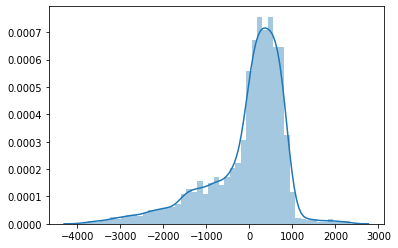

In [201]:
import seaborn as sns
sns.distplot(days_to_bankruptcy)

In [210]:
bankrupt_dat['d_to_bankruptcy'] = days_to_bankruptcy

In [211]:
bankrupt_dat_filt = bankrupt_dat[bankrupt_dat.d_to_bankruptcy>=0]

In [232]:
bankrupt_dat['banruptcy_6_mo'] = [ 0 if i >185 else 1 for i in bankrupt_dat['d_to_bankruptcy']]

In [245]:
non_bankrupt_dat['Filing Date']=pd.to_datetime(non_bankrupt_dat['Filing Date'], format="%Y-%m-%d")

In [252]:
all_dat_outer = pd.merge(non_bankrupt_dat, bankrupt_dat, how="outer")

In [244]:
non_bankrupt_dat['Filing Date'].dtypes

dtype('O')

In [253]:
all_dat_outer.to_pickle("./FINAL_data.pkl")